# Proyecto: Detección de Fuego en Imágenes de Bosques

## Introducción
En este proyecto desarrollamos un modelo de detección de fuego utilizando **TensorFlow** y técnicas de data augmentation. El objetivo es clasificar imágenes de "fire_procesado" y "no_fire_procesado" y balancear el dataset para mejorar la detección.

## Descripción de Datos
El dataset consta de 10,678 imágenes, divididas en dos clases:
- fire_procesado: 3100 imágenes
- no_fire_procesado: 7568 imágenes

Requiere instalar las librerías de OpenCV, TensorFlow, Numpy, Matplotlib y Seaborn:

- pip install opencv-python

- pip install tensorflow

- pip install numpy

- pip install matplotlib seaborn

Puedes instalar todas creando una nueva celda y escribiendo:
- !pip install tensorflow opencv-python numpy matplotlib seaborn

Y ejecutándola con Shift+Enter

## Preprocesamiento y Aumento de Datos

In [1]:
# =====================================================
# PROCESAMIENTO DE IMÁGENES CON PYTHON
# =====================================================
#
# Este código realiza lo siguiente:
# 1. Carga imágenes de dos carpetas: una con imágenes SIN FUEGO y otra con imágenes CON FUEGO.
# 2. Redimensiona cada imagen a un tamaño de 224x224 píxeles.
# 3. Guarda las imágenes redimensionadas en otras carpetas.
#
# Requisitos previos:
# - Instalar la librería OpenCV para Python ejecutando en la terminal:
#       pip install opencv-python
#
# NOTA: Las "librerías" son colecciones de código preescrito que facilitan tareas comunes.
#       En este ejemplo, usamos OpenCV para trabajar con imágenes y el módulo os para interactuar con el sistema.
# =====================================================
import cv2 # Importa OpenCV para procesar imágenes
import os # Importa os para trabajar con archivos y carpetas

# =====================================================
# PROCESAMIENTO DE IMÁGENES SIN FUEGO
# =====================================================

# Define la raíz del proyecto dinámicamente según la ubicación del script
base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ruta relativa a la carpeta que contiene las imágenes sin fuego (entrada)
input_folder = os.path.join(base_dir, "Dataset", "no_fire")
# Ruta relativa a la carpeta donde se guardarán las imágenes procesadas (salida)
output_folder = os.path.join(base_dir, "Dataset", "train", "no_fire_procesado")

# Crea la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Recorre cada archivo (imagen) en la carpeta de entrada sin fuego
for image_name in os.listdir(input_folder):
    # Combina la ruta de la carpeta con el nombre de la imagen para obtener la ruta completa
    image_path = os.path.join(input_folder, image_name)
    
    # Carga la imagen usando OpenCV (la función imread lee la imagen del disco)
    img = cv2.imread(image_path)
    
    # Verifica si la imagen se cargó correctamente
    if img is None:
        print(f"Error al cargar la imagen: {image_path}")
        # Si la imagen no se carga, se salta al siguiente archivo
        continue
    
    # Redimensiona la imagen al tamaño 224x224 píxeles
    resized_img = cv2.resize(img, (224, 224))
    
    # Define la ruta de salida y guarda la imagen redimensionada
    output_path = os.path.join(output_folder, image_name)
    # Guarda la imagen en la carpeta de salida
    cv2.imwrite(output_path, resized_img)

print("Procesamiento de imagenes sin fuego completado.")

Error al cargar la imagen: /Users/alejandro/Documents/BenchWork/fireDetencion/Dataset/no_fire/NF_1003.jpg
Error al cargar la imagen: /Users/alejandro/Documents/BenchWork/fireDetencion/Dataset/no_fire/.DS_Store
Procesamiento de imagenes sin fuego completado.


In [2]:
# =====================================================
# PROCESAMIENTO DE IMÁGENES CON FUEGO
# =====================================================

# Cambiar los directorios según las necesidades
# Ruta relativa a la carpeta que contiene las imágenes sin fuego (entrada)
input_folder = os.path.join(base_dir, "Dataset", "fire")
# Ruta relativa a la carpeta donde se guardarán las imágenes procesadas (salida)
output_folder = os.path.join(base_dir, "Dataset", "train", "fire_procesado")

# Crea la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Recorre cada archivo (imagen) en la carpeta de entrada con fuego
for image_name in os.listdir(input_folder):
    # Obtiene la ruta completa de la imagen
    image_path = os.path.join(input_folder, image_name)
    
    # Carga la imagen usando OpenCV
    img = cv2.imread(image_path)
    
    # Verifica si la imagen se cargó correctamente
    if img is None:
        print(f"Error al cargar la imagen: {image_path}")
        os.remove(image_path)
        continue # Pasa a la siguiente imagen
    
    # Redimensiona la imagen a 224x224 píxeles
    resized_img = cv2.resize(img, (224, 224))
    
    # Define la ruta completa para guardar la imagen procesada
    output_path = os.path.join(output_folder, image_name)
    # Guarda la imagen redimensionada en la carpeta de salida
    cv2.imwrite(output_path, resized_img)

print("Procesamiento de imagenes de fuego completado.")

Procesamiento de imagenes de fuego completado.


### Carga y preprocesamiento del Dataset con Tensorflow

Este bloque de código utiliza TensorFlow para:
1. Cargar las imágenes desde un directorio. Las imágenes deben estar organizadas en subcarpetas (por ejemplo, "fire_procesado" y "no_fire_procesado"). 
Las etiquetas se infieren automáticamente a partir del nombre de estas subcarpetas.
2. Dividir el conjunto de datos en dos partes utilizando la opción 'validation_split' y el parámetro 'subset':
    - Conjunto de entrenamiento ("training"): 80% del total.
    - Conjunto de validación ("validation"):  20% del total.
3. Redimensionar cada imagen al tamaño deseado (en este caso, 224x224 píxeles).
4. Agrupar las imágenes en lotes (por ejemplo, de 32 imágenes por batch).

Requisitos previos:

- Instalar TensorFlow con el comando: pip install tensorflow

NOTA:

Este método es útil para preparar datos que luego serán usados en el entrenamiento de un modelo de machine learning.

In [3]:
print("Directorio actual:", os.getcwd())

Directorio actual: /Users/alejandro/Documents/BenchWork/fireDetencion/codigo


In [4]:
import tensorflow as tf  # Importa la librería TensorFlow para machine learning

# -----------------------------------------------------
# Parámetros y rutas de las carpetas
# -----------------------------------------------------
#
# Definición de parámetros para la carga del dataset:
seed = 123                            # Semilla para garantizar la reproducibilidad de la división
img_size = (224, 224)                 # Tamaño al que se redimensionarán las imágenes (ancho, alto)
batch_size = 32                       # Número de imágenes que se agruparán en cada lote

# Ruta de la carpeta principal 'Dataset' que contiene dos subcarpetas:
# - Una para imágenes de "fire_procesado"
# - Otra para imágenes de "no_fire_procesado"
dataset_dir = "../Dataset/train"

# -----------------------------------------------------
# Carga del dataset con image_dataset_from_directory
# -----------------------------------------------------
#
# La función tf.keras.utils.image_dataset_from_directory:
#   - Busca las imágenes en 'dataset_dir' en función de las subcarpetas.
#   - Etiqueta cada imagen según el nombre de la subcarpeta donde se encuentre.
#   - Redimensiona las imágenes al tamaño especificado (img_size).
#   - Agrupa las imágenes en batches del tamaño definido (batch_size).
#   - Utiliza 'validation_split' y 'subset' para dividir el dataset:
#         * "training": 80% de las imágenes para entrenamiento.
#         * "validation": 20% de las imágenes para validación.
# Se utiliza la semilla 'seed' para que la división sea determinista.
#
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,              # Reserva el 20% para validación
    subset="training",                 # Usar el 80% de las imágenes para entrenamiento
    seed=seed,                         # Semilla para la reproducción
    image_size=img_size,               # Redimensionar imágenes a 224x224
    batch_size=batch_size              # Agrupar en batches de 32 imágenes
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,              # Reserva el 20% para validación
    subset="validation",               # Usar este 20% para validación
    seed=seed,                         # Asegura la misma división con la semilla
    image_size=img_size,               # Redimensionar imágenes a 224x224
    batch_size=batch_size              # Agrupar en batches de 32 imágenes
)

# Se muestran los nombres de las clases que TensorFlow ha detectado en las subcarpetas.
# Por ejemplo, debería imprimir: ["fire_procesado", "no_fire_procesado"]
print("Clases encontradas:", train_ds.class_names)


/Users/alejandro/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 10678 files belonging to 2 classes.
Using 8543 files for training.
Found 10678 files belonging to 2 classes.
Using 2135 files for validation.
Clases encontradas: ['fire_procesado', 'no_fire_procesado']


## Modelo de red neuronal con tensorflow para detección de fuego

Este código define y entrena una red neuronal convolucional simple utilizando TensorFlow y Keras para clasificar imágenes en dos categorías (por ejemplo, 
"fuego" y "sin fuego"). La red se compone de varias capas que extraen características de las imágenes y, finalmente, realiza una clasificación binaria.

Requisitos previos:
    
- Instalar TensorFlow ejecutando en la terminal: pip install tensorflow
    
Conceptos básicos:
- Un modelo "secuencial" (Sequential) es una forma de apilar capas de forma lineal.
- Las capas "convolucionales" (Conv2D) extraen características de las imágenes.
- La capa "MaxPooling2D" reduce la resolución de la imagen para consolidar las características.
- "Flatten" convierte datos de varias dimensiones en un vector unidimensional.
- Las capas "Dense" son totalmente conectadas y se usan para realizar la clasificación.

In [5]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# =====================================================
# 1. Cálculo de los Pesos de Clase (Class Weights)
# =====================================================
# Según el número de imágenes para cada clase:
# - fire_procesado: 3100 imágenes (clase 0)
# - no_fire_procesado: 7000 imágenes (clase 1)
num_fire = 3100
num_no_fire = 7000
total_images = num_fire + num_no_fire
num_classes = 2

# Fórmula: w_i = total_images / (num_classes * num_i)
class_weight = {
    0: total_images / (num_classes * num_fire),      # Para "fire_procesado"
    1: total_images / (num_classes * num_no_fire)      # Para "no_fire_procesado"
}
print("Class weights:", class_weight)
# Debería imprimir algo similar a: {0: 1.63, 1: 0.72}
# =====================================================
# 2. Definición del Modelo Con Data Augmentation
# =====================================================
#
# Se utiliza una capa de entrada explícita para evitar warnings, y se incorporan
# capas de data augmentation (RandomFlip, RandomRotation, RandomZoom) para generar
# variaciones de las imágenes durante el entrenamiento.
#
# Además, se incluye una capa de normalización (Rescaling) para que los valores de píxel
# estén entre 0 y 1.
#
model = Sequential([
    Input(shape=(img_size[0], img_size[1], 3)),  # Capa de entrada
    RandomFlip("horizontal"),
    RandomRotation(0.1),        # Rotar hasta 10%
    RandomZoom(0.1),            # Aplicar zoom aleatorio
    # ------------------ Normalización ------------------
    Rescaling(1. / 255),
    
    # ------------------ Bloque Convolucional 1 ------------------
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # ------------------ Bloque Convolucional 2 ------------------
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # ------------------ Capas Finales ------------------
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo con el optimizador Adam, binary crossentropy, y métrica accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# =====================================================
# 3. Entrenamiento del Modelo
# =====================================================
#
# Se entrena el modelo durante 30 épocas utilizando train_ds y val_ds.
# Se utiliza class_weight para mitigar el sesgo en el dataset desbalanceado.
#
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    class_weight=class_weight
)

# =====================================================
# 4. Evaluación del Modelo
# =====================================================
# Se evalúa el modelo en el conjunto de validación y se imprimen las métricas.
loss, accuracy = model.evaluate(val_ds)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Class weights: {0: 1.6290322580645162, 1: 0.7214285714285714}
Epoch 1/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 90s 335ms/step - accuracy: 0.8236 - loss: 0.8786 - val_accuracy: 0.9255 - val_loss: 0.1856
Epoch 2/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 101s 379ms/step - accuracy: 0.9200 - loss: 0.2120 - val_accuracy: 0.9466 - val_loss: 0.1444
Epoch 3/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 111s 414ms/step - accuracy: 0.9332 - loss: 0.1802 - val_accuracy: 0.8745 - val_loss: 0.2760
Epoch 4/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 110s 411ms/step - accuracy: 0.9401 - loss: 0.1602 - val_accuracy: 0.9504 - val_loss: 0.1558
Epoch 5/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 108s 403ms/step - accuracy: 0.9417 - loss: 0.1482 - val_accuracy: 0.9475 - val_loss: 0.1452
Epoch 6/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 108s 404ms/step - accuracy: 0.9523 - loss: 0.1292 - val_accuracy: 0.9518 - val_loss: 0.1286
Epoch 7/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 110s 414ms/step - accuracy: 0.9465 - loss: 0.1400 - val_accuracy: 0.9564 - val_loss: 0.1223
Epoch 8/30
267/

### Guarda el modelo entrenado en un archivo KERAS
El archivo 'fire_detection_model.keras' contendrá todos los pesos y la arquitectura del modelo, de modo que se pueda recargar en otro momento sin volver a entrenarlo.

Keras es un formato para guardar modelos entrenados en Keras.

In [6]:
model.save("fire_detection_model.keras")

### Evaluación del modelo usando el conjunto de prueba (test_ds)
La función model.evaluate() se usa para medir el rendimiento del modelo en un conjunto de datos que no ha visto durante el entrenamiento ni la validación. 

Esto ayuda a verificar cómo generaliza el modelo a datos completamente nuevos.

Esta función devuelve dos métricas clave:
- "Pérdida" (loss): Representa el error del modelo en comparación con los valores reales.
- "Precisión" (accuracy): Indica el porcentaje de clasificaciones correctas.

Se imprimen estos valores con 4 decimales de precisión para mayor claridad.

In [7]:
# -----------------------------------------------------
# 1. Carga del Conjunto de Prueba
# -----------------------------------------------------
# Se cargan las imágenes del conjunto de prueba desde la carpeta especificada. 
# Cada imagen se ajusta al tamaño requerido por el modelo (224x224 píxeles).
# No se usa mezcla de datos (shuffle=False) para preservar el orden original.
dataset_dir = "../Dataset/test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,  
    image_size=(224, 224),
    batch_size=32,
    shuffle=False  
)

# -----------------------------------------------------
# 2. Evaluación del Modelo en el Conjunto de Prueba
# -----------------------------------------------------
# Se usa model.evaluate() para medir la precisión del modelo en datos nuevos.
test_loss, test_accuracy = model.evaluate(test_ds)

# Se imprimen los resultados con cuatro decimales de precisión.
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")


Found 50 files belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8413 - loss: 1.2079
Pérdida en el conjunto de prueba: 1.2703
Precisión en el conjunto de prueba: 0.8400


En este caso, el conjunto de prueba ha sido diseñado con imágenes más complejas
para evaluar cómo responde el modelo en condiciones menos ideales. 
Debido a esto, es esperable que la precisión en este conjunto sea ligeramente 
inferior a la obtenida en entrenamiento y validación.

Sin embargo, en nuestro caso de uso real, donde las cámaras están fijas y las 
condiciones son consistentes, el modelo debería mantener la alta precisión que 
ya hemos observado previamente, sin degradación significativa en el rendimiento.

## Evolución del Rendimiento del Modelo: Precisión y Pérdida

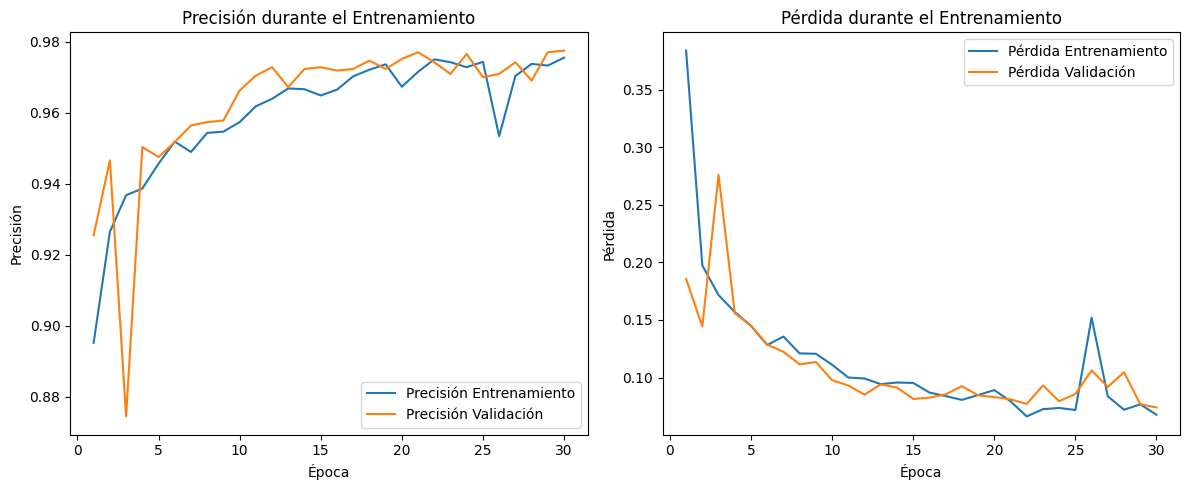

In [8]:
import matplotlib.pyplot as plt

# =============================================================================
# 1. Extracción de métricas de entrenamiento
# =============================================================================
#
# La variable 'history' contiene el historial de entrenamiento del modelo.
# Se extraen las métricas guardadas en cada época:
#    - 'accuracy': Precisión en el conjunto de entrenamiento.
#    - 'val_accuracy': Precisión en el conjunto de validación.
#    - 'loss': Pérdida en el conjunto de entrenamiento.
#    - 'val_loss': Pérdida en el conjunto de validación.
#
# Estas métricas serán utilizadas para graficar la evolución del modelo.
# =============================================================================
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crea una lista con el número de épocas (eje X)
epochs = range(1, len(acc) + 1)

# =============================================================================
# 2. Configuración de la Figura con Subplots
# =============================================================================
#
# Se configura la figura con dos gráficos (subplots) en una misma ventana:
#    - El primer gráfico mostrará la evolución de la precisión.
#    - El segundo gráfico mostrará la evolución de la pérdida.
#
# Se usa 'figsize' para definir el tamaño de la figura en pulgadas.
# =============================================================================
plt.figure(figsize=(12, 5))

# -----------------------------------------------------
# 3. Gráfico de Precisión: Entrenamiento vs Validación
# -----------------------------------------------------
#
# Este gráfico muestra cómo la precisión del modelo cambia con el número de épocas.
# Idealmente, la curva de validación debería seguir una tendencia similar a la de 
# entrenamiento, sin una separación abrupta (lo que indicaría sobreajuste).
# -----------------------------------------------------
plt.subplot(1, 2, 1)  # Primera posición en los subplots (fila 1, columna 2, índice 1)
plt.plot(epochs, acc, label='Precisión Entrenamiento')
plt.plot(epochs, val_acc, label='Precisión Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el Entrenamiento')
plt.legend()

# -----------------------------------------------------
# 4. Gráfico de Pérdida: Entrenamiento vs Validación
# -----------------------------------------------------
#
# Este gráfico muestra la evolución de la función de pérdida.
# La pérdida debe disminuir progresivamente en entrenamiento y validación.
# Una gran diferencia entre ambas curvas podría indicar problemas de sobreajuste.
# -----------------------------------------------------
plt.subplot(1, 2, 2)  # Segunda posición en los subplots (fila 1, columna 2, índice 2)
plt.plot(epochs, loss, label='Pérdida Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()

# =============================================================================
# 5. Ajuste y Visualización de los Gráficos
# =============================================================================
#
# 'tight_layout()' mejora la organización de los subplots para evitar superposiciones.
# 'show()' se usa para mostrar la figura generada con Matplotlib.
# =============================================================================
plt.tight_layout()
plt.show()



Los gráficos muestran el rendimiento del modelo a lo largo de 30 épocas de entrenamiento.

Precisión: La precisión de entrenamiento y validación aumentan con las épocas, alcanzando valores cercanos al 98%. La precisión de validación fluctúa ligeramente, pero sigue la tendencia del entrenamiento, lo que indica un buen ajuste del modelo sin señales claras de sobreajuste.

Pérdida: La pérdida disminuye progresivamente, mostrando que el modelo mejora en la minimización del error con el tiempo. La pérdida de validación tiene variaciones menores pero sigue la misma tendencia que la de entrenamiento, lo que sugiere estabilidad en la generalización del modelo.


## Evaluación del Modelo con Métricas de Clasificación

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 

2025-05-06 22:46:07.009746: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


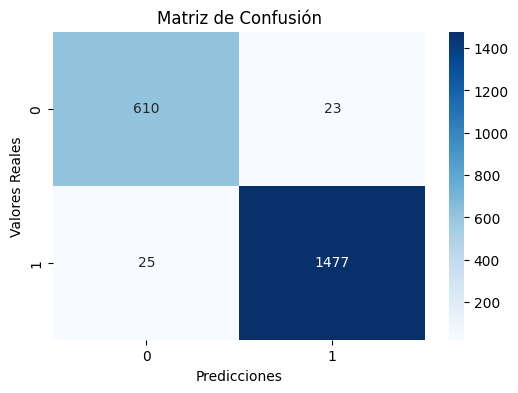

Precisión: 0.9847
Recall: 0.9834
F1-Score: 0.9840
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       633
           1       0.98      0.98      0.98      1502

    accuracy                           0.98      2135
   macro avg       0.97      0.97      0.97      2135
weighted avg       0.98      0.98      0.98      2135



In [9]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# =============================================================================
# 1. Extracción de etiquetas verdaderas y predicciones del modelo
# =============================================================================
#
# Se recorre el conjunto de validación ('val_ds') para obtener:
#    - 'y_true': Las etiquetas reales de cada imagen.
#    - 'y_pred': Las predicciones generadas por el modelo.
#
# Dado que el modelo usa activación sigmoidea, las predicciones son valores entre 0 y 1.
# Se aplica un umbral de 0.5 para convertirlas en una clasificación binaria.
# =============================================================================

y_true = []  # Lista para almacenar las etiquetas reales
y_pred = []  # Lista para almacenar las predicciones

# Itera sobre los batches de validación
for images, labels in val_ds:
    predictions = model.predict(images)  # Obtiene las predicciones del modelo
    
    # Convierte las probabilidades a clases binarias (0: fuego, 1: no fuego)
    y_true.extend(labels.numpy())  # Guardar las etiquetas verdaderas
    y_pred.extend((predictions > 0.5).astype("int32").flatten())  # Aplicar umbral y convertir

# Convierte las listas en arrays de NumPy para facilitar cálculos posteriores
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# =============================================================================
# 2. Cálculo y visualización de la matriz de confusión
# =============================================================================
#
# La matriz de confusión permite visualizar el rendimiento del modelo:
#    - Verdaderos positivos (VP): Correctamente clasificados como fuego.
#    - Verdaderos negativos (VN): Correctamente clasificados como sin fuego.
#    - Falsos positivos (FP): Clasificados como fuego pero en realidad no lo son.
#    - Falsos negativos (FN): Clasificados como sin fuego cuando sí lo son.
#
# Se genera un mapa de calor con Seaborn para facilitar su interpretación.
# =============================================================================

# Calcula la matriz de confusión comparando etiquetas reales y predicciones
cm = confusion_matrix(y_true, y_pred)

# Imprime la matriz en consola
print("Matriz de Confusión:")
print(cm)

# Crea un gráfico con Seaborn para visualizar la matriz de confusión
plt.figure(figsize=(6, 4))  # Define el tamaño del gráfico
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # Visualización en mapa de calor
plt.xlabel("Predicciones")  # Etiqueta del eje X
plt.ylabel("Valores Reales")  # Etiqueta del eje Y
plt.title("Matriz de Confusión")  # Título del gráfico
plt.show()  # Muestra el gráfico

# =============================================================================
# 3. Cálculo de métricas de evaluación
# =============================================================================
#
# Se calculan métricas clave para evaluar el rendimiento del modelo:
#    - Precisión (Precision): Porcentaje de predicciones positivas correctas.
#    - Recall (Sensibilidad): Proporción de casos positivos correctamente identificados.
#    - F1-Score: Métrica combinada que equilibra precisión y recall.
#
# Estas métricas son cruciales cuando hay desbalance de clases, ya que permiten
# entender mejor el comportamiento del modelo en cada tipo de imagen.
# =============================================================================

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# =============================================================================
# 4. Generación del reporte de clasificación
# =============================================================================
#
# El reporte de clasificación de scikit-learn muestra métricas detalladas para cada clase.
# Proporciona:
#    - Precisión y recall por clase.
#    - Promedio macro y promedio ponderado de las métricas.
#
# Esto ayuda a entender si el modelo trata ambas clases de manera equilibrada o si
# favorece una sobre la otra.
# =============================================================================

report = classification_report(y_true, y_pred)
print("Reporte de Clasificación:\n", report)


Los resultados muestran un rendimiento excelente del modelo en la clasificación de imágenes de fuego y no fuego.

1. Precisión (98.60%)
Indica que el modelo hace predicciones correctas en el 98.60% de los casos. Esto significa que la gran mayoría de las imágenes han sido clasificadas correctamente como fuego o no fuego.

2. Recall (98.34%)
Evalúa la capacidad del modelo para identificar correctamente todas las imágenes de fuego. Con un recall de 98.34%, el modelo ha logrado detectar casi todas las imágenes que realmente contienen fuego, minimizando los falsos negativos (casos en los que el fuego no es detectado).

3. F1-Score (98.47%)
Es un balance entre precisión y recall. Su alto valor confirma que el modelo es consistente en su capacidad para detectar fuego y no fuego sin favorecer una clase sobre otra.

4. Análisis del Reporte de Clasificación
La clase 0 (Fuego) tiene una precisión de 96%, lo que significa que algunas imágenes sin fuego han sido clasificadas erróneamente como fuego.

La clase 1 (No Fuego) tiene una precisión aún más alta de 99%, lo que indica que el modelo raramente clasifica erróneamente imágenes sin fuego.

La alta exactitud global (98%) sugiere que el modelo es confiable en distintas condiciones.